In [1]:
import os
import matplotlib.pyplot as plt
# import copy
import numpy as np
import sys
import pickle

from joblib import Parallel, delayed

from envs.cell_model import CellConfig
from envs.envs import EnvConfig, ControlNutrientEnv

from agent.MLP_full import CDQL

### visualize famine protocol

In [ ]:
initialize_app = "starve_apply" # sys.argv[2]
antibiotic_value = 3.2 # float(sys.argv[3])
rep = 1 # int(sys.argv[5])
results_dir = "../results/" # sys.argv[6]

num_decisions = 300

cell_config = CellConfig()
env_config = EnvConfig(
    warm_up = 37, delay_embed_len = 20,
    b_actions = [0, antibiotic_value],
    k_n0_actions = [1.0, 4.0],
    max_pop = np.inf,
    num_actions = 4
)


env = ControlNutrientEnv(env_config, cell_config)

folder_name=f"{results_dir}/a{antibiotic_value:.2f}_value_check/{initialize_app}/"
os.makedirs(folder_name, exist_ok=True)

if initialize_app == "starve_apply":
    k_n0 = min(env_config.k_n0_actions)
    b = max(env_config.b_actions)
elif initialize_app == "feed_apply":
    k_n0 = max(env_config.k_n0_actions)
    b = max(env_config.b_actions)

num_of_reps = 30
for i in range(num_of_reps):
    env.reset()
    for _ in range(num_decisions):
        _, _, terminated, truncated, info = env.step_hardcode(k_n0, b)
        if terminated or truncated:
            break
    fname="trial_%d"%int(rep*num_of_reps+i)

    with open(os.path.join(folder_name,str(fname)+'tcbk_test.pkl'), "wb") as f:
        pickle.dump(info, f)
print("Done")
# sys.exit(0)

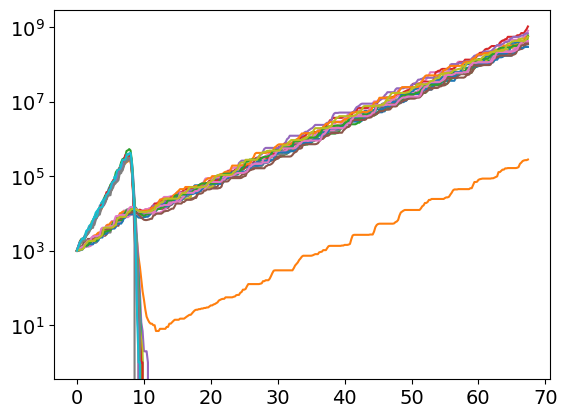

In [7]:
for i in range(num_of_reps):
    fname="trial_%d"%int(rep*num_of_reps+i)
    with open(folder_name+'/'+str(fname)+'tcbk_test.pkl', 'rb') as file:
        test = pickle.load(file)
    np_test = np.array(test['log'])

    plt.plot(np_test[:,0],np_test[:,3])
plt.yscale('log')
plt.show()

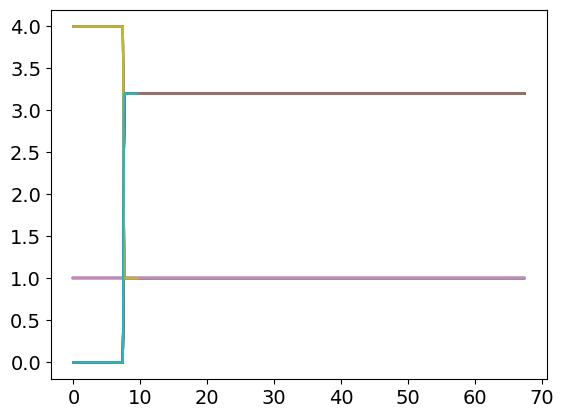

In [8]:
for i in range(num_of_reps):
    fname="trial_%d"%int(rep*num_of_reps+i)
    with open(folder_name+'/'+str(fname)+'tcbk_test.pkl', 'rb') as file:
        test = pickle.load(file)
    np_test = np.array(test['log'])

    plt.plot(np_test[:,0],np_test[:,1])
    plt.plot(np_test[:,0],np_test[:,2])
plt.show()

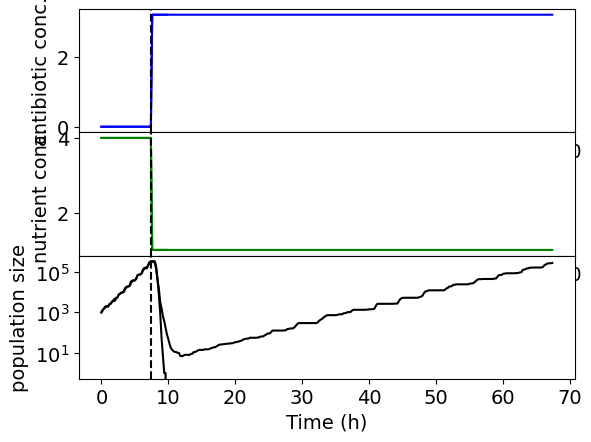

In [ ]:
i_s = [1, 3]
initialize_app = 'starve_apply'
folder_name=f"{results_dir}/a{antibiotic_value:.2f}_value_check/{initialize_app}/"

figure, ax = plt.subplots(3,1)
figure.subplots_adjust(hspace=.0)

for i in i_s:
    fname="trial_%d"%int(rep*num_of_reps+i)
    with open(folder_name+'/'+str(fname)+'tcbk_test.pkl', 'rb') as file:
        test = pickle.load(file)
    np_test = np.array(test['log'])
    delta_t = info['delta_t']
    warm_up = info['warm_up']

    ax[0].plot(np_test[:,0],np_test[:,2], color='blue')
    ax[1].plot(np_test[:,0],np_test[:,1], color='green')
    ax[2].plot(np_test[:,0],np_test[:,3], color='k')
ax[0].set_ylabel('antibiotic conc.')
ax[0].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[1].set_ylabel('nutrient conc.')
ax[1].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[2].set_ylabel('population size')
ax[2].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[2].set_xlabel('Time (h)')
ax[2].set_yscale('log')
plt.show()
# figure.savefig('traj_starve.pdf', dpi=300, bbox_inches='tight')

### visualize feast protocol

In [ ]:
initialize_app = "feed_apply" # sys.argv[2]
antibiotic_value = 3.2 # float(sys.argv[3])
rep = 1 # int(sys.argv[5])
results_dir = "../results/" # sys.argv[6]

num_decisions = 300

cell_config = CellConfig()
env_config = EnvConfig(
    warm_up = 37, delay_embed_len = 20,
    b_actions = [0, antibiotic_value],
    k_n0_actions = [1.0, 4.0],
    max_pop = np.inf,
    num_actions = 4
)


env = ControlNutrientEnv(env_config, cell_config)

folder_name=f"{results_dir}/a{antibiotic_value:.2f}_value_check/{initialize_app}/"
os.makedirs(folder_name, exist_ok=True)

if initialize_app == "starve_apply":
    k_n0 = min(env_config.k_n0_actions)
    b = max(env_config.b_actions)
elif initialize_app == "feed_apply":
    k_n0 = max(env_config.k_n0_actions)
    b = max(env_config.b_actions)

num_of_reps = 10
for i in range(num_of_reps):
    env.reset()
    for _ in range(num_decisions):
        _, _, terminated, truncated, info = env.step_hardcode(k_n0, b)
        if terminated or truncated:
            break
    fname="trial_%d"%int(rep*num_of_reps+i)

    with open(os.path.join(folder_name,str(fname)+'tcbk_test.pkl'), "wb") as f:
        pickle.dump(info, f)
print("Done")
# sys.exit(0)

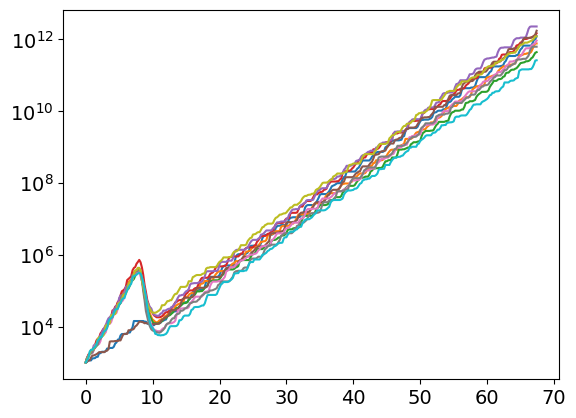

In [9]:
for i in range(num_of_reps):
    fname="trial_%d"%int(rep*num_of_reps+i)
    with open(folder_name+'/'+str(fname)+'tcbk_test.pkl', 'rb') as file:
        test = pickle.load(file)
    np_test = np.array(test['log'])

    plt.plot(np_test[:,0],np_test[:,3])
plt.yscale('log')
plt.show()

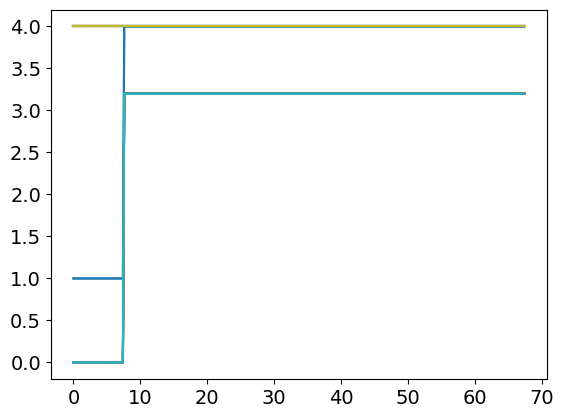

In [10]:
for i in range(num_of_reps):
    fname="trial_%d"%int(rep*num_of_reps+i)
    with open(folder_name+'/'+str(fname)+'tcbk_test.pkl', 'rb') as file:
        test = pickle.load(file)
    np_test = np.array(test['log'])

    plt.plot(np_test[:,0],np_test[:,1])
    plt.plot(np_test[:,0],np_test[:,2])
plt.show()

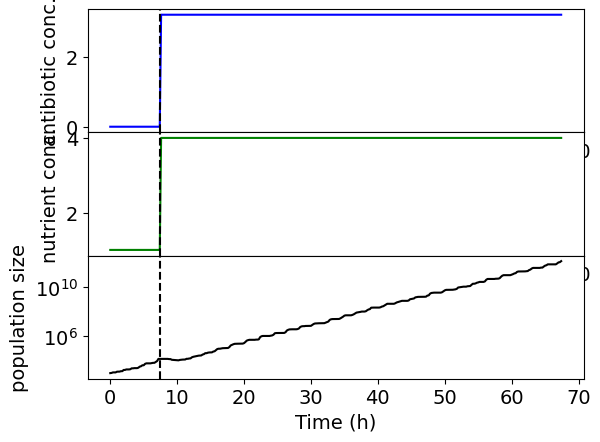

In [ ]:
i = 0
initialize_app = 'feed_apply'
folder_name=f"{results_dir}/a{antibiotic_value:.2f}_value_check/{initialize_app}/"

figure, ax = plt.subplots(3,1)
figure.subplots_adjust(hspace=.0)

fname="trial_%d"%int(rep*num_of_reps+i)
with open(folder_name+'/'+str(fname)+'tcbk_test.pkl', 'rb') as file:
    test = pickle.load(file)
np_test = np.array(test['log'])
delta_t = info['delta_t']
warm_up = info['warm_up']

ax[0].plot(np_test[:,0],np_test[:,2], color='blue')
ax[1].plot(np_test[:,0],np_test[:,1], color='green')
ax[2].plot(np_test[:,0],np_test[:,3], color='k')
ax[0].set_ylabel('antibiotic conc.')
ax[0].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[1].set_ylabel('nutrient conc.')
ax[1].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[2].set_ylabel('population size')
ax[2].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[2].set_xlabel('Time (h)')
ax[2].set_yscale('log')
plt.show()
# figure.savefig('traj_clinical.pdf', dpi=300, bbox_inches='tight')

### parallelize and evaluate hardcoded and learned policies

In [7]:
def eval_step(i, rep, folder_name, num_decisions, num_of_reps):

    env.reset()
    for _ in range(num_decisions):
        _, _, terminated, truncated, info = env.step_hardcode(k_n0, b)
        if terminated or truncated:
            break
    fname="trial_%d"%int(rep*num_of_reps+i)

    with open(os.path.join(folder_name,str(fname)+'tcbk.pkl'), "wb") as f:
        pickle.dump(info, f)

    info = np.array(info['log'])
    return info[-1,3], info[-1,0]

def compute_extinct_frac(rep: int, folder_name: str, num_of_reps: int, num_decisions: int, eval_func: callable) -> float:
    extinct_times = []
    extinct_count = 0

    results = Parallel(n_jobs=10)(delayed(eval_func)(i,rep,folder_name,num_decisions,num_of_reps) for i in range(num_of_reps))
    # results = [eval_step(i,rep,folder_name,num_decisions,num_of_reps) for i in range(num_of_reps)]

    cell_count, end_t = list(zip(*results))
    for c,t in zip(cell_count,end_t):
        # save extinction times
        if c == 0:
            extinct_times.append(t)
            extinct_count +=1
    ext_frac = extinct_count / num_of_reps

    fname="trial_%d"%int(rep)

    with open(os.path.join(folder_name,str(fname)+'ext_frac.pkl'), "wb") as f:
        pickle.dump(ext_frac, f)

    return ext_frac

In [ ]:
antibiotic_value = 3.2 # float(sys.argv[3])
total_reps = 20 # int(sys.argv[5])
num_of_reps = 10
results_dir = "../results/" # sys.argv[6]
num_decisions = 300
b_actions = [0, antibiotic_value]
k_n0_actions = [1.0, 4.0]
delay_embed_len = 20
warm_up = 37

cell_config = CellConfig()
env_config = EnvConfig(
    warm_up = warm_up, delay_embed_len = delay_embed_len,
    b_actions = b_actions,
    k_n0_actions = k_n0_actions,
    max_pop = np.inf,
    num_actions = len(b_actions)*len(k_n0_actions)
)

env = ControlNutrientEnv(env_config, cell_config)

test_conditions = ["starve_apply","feed_apply"]
ext_fracs_all = []
ext_fracs_std = []

for initialize_app in test_conditions:

    folder_name=f"{results_dir}/a{antibiotic_value:.2f}_value_check/{initialize_app}/"
    os.makedirs(folder_name, exist_ok=True)

    if initialize_app == "starve_apply":
        k_n0 = min(env_config.k_n0_actions)
        b = max(env_config.b_actions)
    elif initialize_app == "feed_apply":
        k_n0 = max(env_config.k_n0_actions)
        b = max(env_config.b_actions)

    ext_fracs = [compute_extinct_frac(i, folder_name, num_of_reps, num_decisions, eval_step) for i in range(total_reps)]
    ext_fracs_all.append(sum(ext_fracs)/len(ext_fracs))
    ext_fracs_std.append(np.std(np.array(ext_fracs)))

print("Done")
# sys.exit(0)

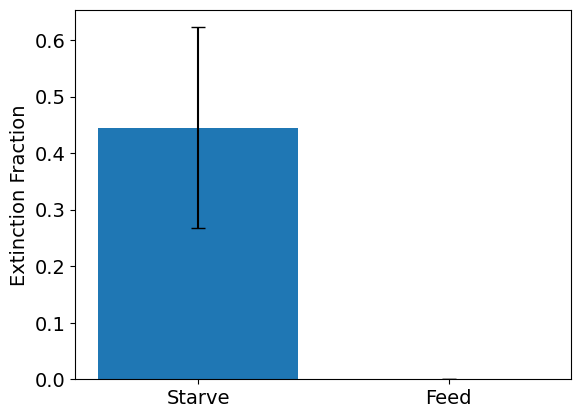

In [45]:
plt.rcParams.update({"font.size": 14})
fig = plt.figure()

condition_labels = ['Starve','Feed']
plt.bar(condition_labels,ext_fracs_all, yerr=ext_fracs_std, capsize=5)
plt.ylabel('Extinction Fraction')
plt.show()

In [46]:
def eval_rollout(i_eval, rep_eval, eval_out, num_decisions, num_of_reps_eval):
    _, _, _, _, info = c.eval_step(num_decisions=num_decisions)
    fname=f"trial_{rep_eval*num_of_reps_eval+i_eval}"
    with open(os.path.join(eval_out, str(fname)+'tcbk.pkl'), "wb") as f:
        pickle.dump(info, f)

    info = np.array(info['log'])
    return info[-1,3], info[-1,0]

In [ ]:
trial_name = f"a{antibiotic_value:.2f}_delay{delay_embed_len}"
# folder_name = f"{results_dir}/{trial_name}/"
# load in previously trained model
folder_name = "/Users/Josiah/Documents/OSPool/feb24_nutr_drug_control2act/Fluc_nutrient/"

eval_out = f"{results_dir}_eval/{trial_name}/"
os.makedirs(eval_out, exist_ok=True)

## ----- RL setting ----- ##
k_n0_observation = True
b_observation = True
use_gpu = False

cell_config = CellConfig()
env_config = EnvConfig(
    k_n0_observation = k_n0_observation,
    b_observation = b_observation,
    warm_up = warm_up, delay_embed_len = delay_embed_len,
    b_actions = b_actions,
    k_n0_actions = k_n0_actions,
)

env = ControlNutrientEnv(env_config, cell_config)
c = CDQL(env,
            buffer_size = 1_000_000,
            batch_size = 512,
            use_gpu = use_gpu)

## ----- RL evaluating ----- ##
c.load_data(folder_name, False)
ext_fracs = [compute_extinct_frac(i, eval_out, num_of_reps, num_decisions, eval_rollout) for i in range(total_reps)]
ext_fracs_all.append(sum(ext_fracs)/len(ext_fracs))
ext_fracs_std.append(np.std(np.array(ext_fracs)))
print("Done")
# sys.exit(0)

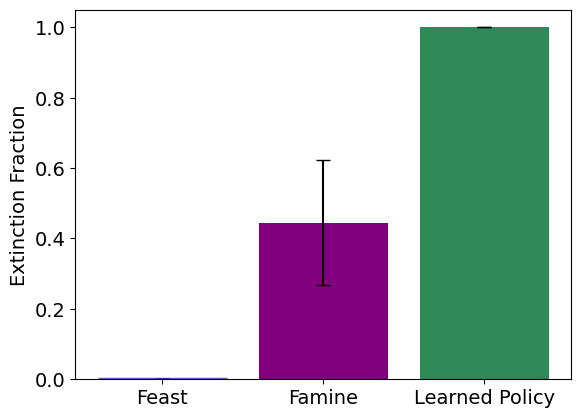

In [48]:
plt.rcParams.update({"font.size": 14})
fig = plt.figure()

condition_labels = ['Famine','Feast','Learned Policy']
plt.bar(condition_labels[1],ext_fracs_all[1], yerr=ext_fracs_std[1], capsize=5, color='slateblue', edgecolor='slateblue', linewidth=2.5)
plt.bar(condition_labels[0],ext_fracs_all[0], yerr=ext_fracs_std[0], capsize=5, color='purple')
plt.bar(condition_labels[2],ext_fracs_all[2], yerr=ext_fracs_std[2], capsize=5, color='seagreen')
plt.ylabel('Extinction Fraction')
plt.show()
fig.savefig('rl_vs_naive_bar_plot.pdf', dpi=300, bbox_inches='tight')

### visualize learned policy

In [ ]:
rep = 1

trial_name = f"a{antibiotic_value:.2f}_delay{delay_embed_len}"
# folder_name = f"{results_dir}/{trial_name}/"
# load in previously trained model
folder_name = "/Users/Josiah/Documents/OSPool/feb24_nutr_drug_control2act/Fluc_nutrient/"

eval_out = f"{results_dir}_eval/{trial_name}/"
os.makedirs(eval_out, exist_ok=True)

## ----- RL setting ----- ##
k_n0_observation = True
b_observation = True
use_gpu = False

cell_config = CellConfig()
env_config = EnvConfig(
    k_n0_observation = k_n0_observation,
    b_observation = b_observation,
    warm_up = warm_up, delay_embed_len = delay_embed_len,
    b_actions = b_actions,
    k_n0_actions = k_n0_actions,
)

env = ControlNutrientEnv(env_config, cell_config)
c = CDQL(env,
            buffer_size = 1_000_000,
            batch_size = 512,
            use_gpu = use_gpu)

## ----- RL evaluating ----- ##
c.load_data(folder_name, False)
for i_eval in range(num_of_reps):
    _, _, _, _, info = c.eval_step(num_decisions=num_decisions)
    fname=f"trial_{rep*num_of_reps+i_eval}"
    with open(os.path.join(eval_out, str(fname)+'tcbk_test.pkl'), "wb") as f:
        pickle.dump(info, f)
print("Done")
# sys.exit(0)

/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The number of calls to function has reached maxfev = 800.
  warnings.warn(msg, RuntimeWarning)


Initial values are physical now
Initial values are physical now
Initial values are physical now
Initial values are physical now
Initial values are physical now
Initial values are physical now
Initial values are physical now
Initial values are physical now
Initial values are physical now
Initial values are physical now
Done


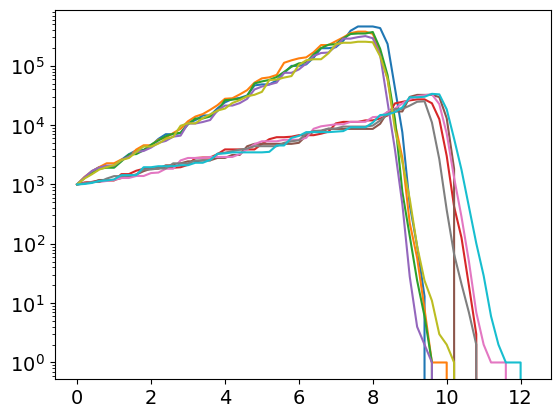

In [33]:
for i_eval in range(num_of_reps):
    with open('../results/_eval/'+trial_name+'/trial_'+str(10+i_eval)+'tcbk_test.pkl', 'rb') as file:
        test = pickle.load(file)
    np_test = np.array(test['log'])

    plt.plot(np_test[:,0],np_test[:,3])
plt.yscale('log')
plt.show()

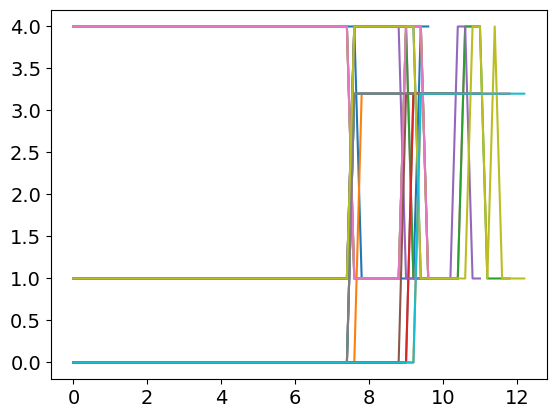

In [34]:
for i_eval in range(num_of_reps):
    with open('../results/_eval/'+trial_name+'/trial_'+str(10+i_eval)+'tcbk_test.pkl', 'rb') as file:
        test = pickle.load(file)
    np_test = np.array(test['log'])

    plt.plot(np_test[:,0],np_test[:,1])
    plt.plot(np_test[:,0],np_test[:,2])
plt.show()

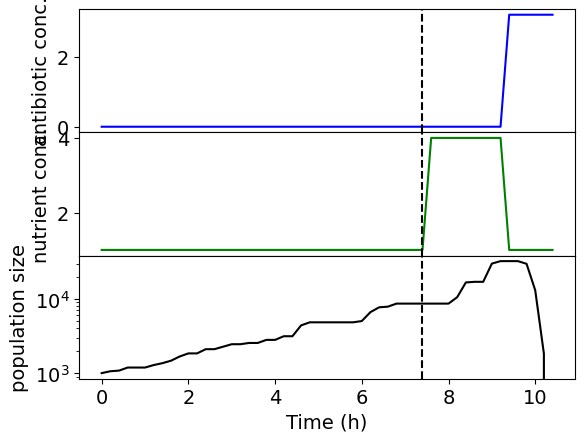

In [ ]:
i_eval = 5

figure, ax = plt.subplots(3,1)
figure.subplots_adjust(hspace=.0)

fname="trial_%d"%int(rep*num_of_reps+i)
with open(eval_out+'trial_'+str(10+i_eval)+'tcbk_test.pkl', 'rb') as file:
    test = pickle.load(file)
np_test = np.array(test['log'])
delta_t = info['delta_t']
warm_up = info['warm_up']

ax[0].plot(np_test[:,0],np_test[:,2], color='blue')
ax[1].plot(np_test[:,0],np_test[:,1], color='green')
ax[2].plot(np_test[:,0],np_test[:,3], color='k')
ax[0].set_ylabel('antibiotic conc.')
ax[0].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[1].set_ylabel('nutrient conc.')
ax[1].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[2].set_ylabel('population size')
ax[2].axvline(x=delta_t*(warm_up), linestyle='--', color='k')
ax[2].set_xlabel('Time (h)')
ax[2].set_yscale('log')
plt.show()
# figure.savefig('traj_learned.pdf', dpi=300, bbox_inches='tight')